In [168]:
#necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("Libraries imported successfully!")

Libraries imported successfully!


In [169]:
# Load the dataset
df = pd.read_csv('student_health_data.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!
Dataset shape: (100, 12)
Number of rows: 100
Number of columns: 12


In [170]:
# Display first few rows
print("\n--- First 5 rows of the dataset ---")
df.head()


--- First 5 rows of the dataset ---


,Student ID,Age,Gender,Blood Oxygen Level (%),Body Temperature (°C),Heart Rate (bpm),Physical Activity Level (METs),Overall Health Score,Date and Time,Sleep Duration (hours),Hydration Level (liters),Stress Level (1-10)
0,1000,16,Male,97.5,37.4,71,7.1,84,2024-10-23 10:00:00,5.2,3.0,6
1,1001,17,Female,99.6,36.6,88,3.1,79,2024-10-23 10:05:00,6.6,1.8,7
2,1002,17,Male,97.5,36.6,73,4.3,71,2024-10-23 10:10:00,7.4,1.5,10
3,1003,15,Other,96.3,36.9,70,2.4,100,2024-10-23 10:15:00,7.6,2.8,3
4,1004,16,Male,99.1,37.1,68,1.5,77,2024-10-23 10:20:00,5.3,2.2,2


In [171]:
# Display dataset information
print("\n--- Dataset Information ---")
df.info()


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      100 non-null    int64  
 1   Age                             100 non-null    int64  
 2   Gender                          100 non-null    object 
 3   Blood Oxygen Level (%)          100 non-null    float64
 4   Body Temperature (°C)           100 non-null    float64
 5   Heart Rate (bpm)                100 non-null    int64  
 6   Physical Activity Level (METs)  100 non-null    float64
 7   Overall Health Score            100 non-null    int64  
 8   Date and Time                   100 non-null    object 
 9   Sleep Duration (hours)          100 non-null    float64
 10  Hydration Level (liters)        100 non-null    float64
 11  Stress Level (1-10)             100 non-null    int64  
dtypes: float

In [172]:
# Check for missing values
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")


--- Missing Values ---
Student ID                        0
Age                               0
Gender                            0
Blood Oxygen Level (%)            0
Body Temperature (°C)             0
Heart Rate (bpm)                  0
Physical Activity Level (METs)    0
Overall Health Score              0
Date and Time                     0
Sleep Duration (hours)            0
Hydration Level (liters)          0
Stress Level (1-10)               0
dtype: int64

Total missing values: 0


In [173]:
# Convert 'Date and Time' to datetime format
df['Date and Time'] = pd.to_datetime(df['Date and Time'])

print("✓ 'Date and Time' column converted to datetime format")
print(f"Data type now: {df['Date and Time'].dtype}")

✓ 'Date and Time' column converted to datetime format
Data type now: datetime64[ns]


In [174]:
# Remove 'Student ID' column (not needed for ML)
df = df.drop(columns=['Student ID'])

print("✓ 'Student ID' column removed")
print(f"New dataset shape: {df.shape}")
print(f"\nRemaining columns: {list(df.columns)}")

✓ 'Student ID' column removed
New dataset shape: (100, 11)

Remaining columns: ['Age', 'Gender', 'Blood Oxygen Level (%)', 'Body Temperature (°C)', 'Heart Rate (bpm)', 'Physical Activity Level (METs)', 'Overall Health Score', 'Date and Time', 'Sleep Duration (hours)', 'Hydration Level (liters)', 'Stress Level (1-10)']


In [175]:
# Step 1: Create binary target from Overall Health Score
df['target'] = (df['Overall Health Score'] > 80).astype(int)
print("Target created successfully!")
print("\nClass distribution:")
print(df['target'].value_counts())
print("\nPercentage distribution:")
print((df['target'].value_counts(normalize=True) * 100).round(2))

Target created successfully!

Class distribution:
target
1    65
0    35
Name: count, dtype: int64

Percentage distribution:
target
1    65.0
0    35.0
Name: proportion, dtype: float64


In [176]:
# Step 2: Sort data by time to maintain chronological order
df = df.sort_values('Date and Time').reset_index(drop=True)

print("✓ Data sorted chronologically")
print("Check: Is time monotonic increasing?", df['Date and Time'].is_monotonic_increasing)
print("\nFirst 3 timestamps:")
print(df['Date and Time'].head(3))
print("\nLast 3 timestamps:")
print(df['Date and Time'].tail(3))

✓ Data sorted chronologically
Check: Is time monotonic increasing? True

First 3 timestamps:
0   2024-10-23 10:00:00
1   2024-10-23 10:05:00
2   2024-10-23 10:10:00
Name: Date and Time, dtype: datetime64[ns]

Last 3 timestamps:
97   2024-10-23 18:05:00
98   2024-10-23 18:10:00
99   2024-10-23 18:15:00
Name: Date and Time, dtype: datetime64[ns]


In [177]:
# Step 3: Forward fill (currently no missing, but ensures safety after lag features)
num_cols = df.select_dtypes(include=[np.number]).columns

missing_before = df[num_cols].isnull().sum().sum()
if missing_before > 0:
    df[num_cols] = df[num_cols].ffill()
    missing_after = df[num_cols].isnull().sum().sum()
    print(f"✓ Filled {missing_before - missing_after} missing values")
else:
    print(f"✓ No missing values found - data is clean!")

✓ No missing values found - data is clean!


In [178]:
# Step 4: Final verification
print("=" * 50)
print("PART 1 VERIFICATION")
print("=" * 50)

print("\n1. Target variable:")
print(f"   - Column exists: {'target' in df.columns}")
print(f"   - Data type: {df['target'].dtype}")
print(f"   - Unique values: {df['target'].unique()}")

print("\n2. Data sorting:")
print(f"   - Sorted correctly: {df['Date and Time'].is_monotonic_increasing}")

print("\n3. Missing values:")
print(f"   - Total missing: {df.isnull().sum().sum()}")

print("\n4. Current dataframe shape:")
print(f"   - Rows: {df.shape[0]}")
print(f"   - Columns: {df.shape[1]}")


PART 1 VERIFICATION

1. Target variable:
   - Column exists: True
   - Data type: int64
   - Unique values: [1 0]

2. Data sorting:
   - Sorted correctly: True

3. Missing values:
   - Total missing: 0

4. Current dataframe shape:
   - Rows: 100
   - Columns: 12


In [179]:
# Step 3.2: Create Rolling Statistics (30-minute window)
# 30 minutes = 6 rows (each row is 5 minutes)

window_size = 6  # 30 minutes / 5 minutes per row

print(f"Creating Rolling Statistics with {window_size}-row window (30 minutes)...")

# Rolling Mean (average over last 30 minutes)
df['Heart_Rate_rolling_mean_30min'] = df['Heart Rate (bpm)'].rolling(window=window_size, min_periods=1).mean()

# Rolling Std (variability over last 30 minutes)
df['Heart_Rate_rolling_std_30min'] = df['Heart Rate (bpm)'].rolling(window=window_size, min_periods=1).std()

# Same for Physical Activity Level
df['Physical_Activity_rolling_mean_30min'] = df['Physical Activity Level (METs)'].rolling(window=window_size, min_periods=1).mean()

df['Physical_Activity_rolling_std_30min'] = df['Physical Activity Level (METs)'].rolling(window=window_size, min_periods=1).std()

print("\n✓ Rolling features created:")
print("  - Heart_Rate_rolling_mean_30min")
print("  - Heart_Rate_rolling_std_30min")
print("  - Physical_Activity_rolling_mean_30min")
print("  - Physical_Activity_rolling_std_30min")

# Check missing values
rolling_cols = [c for c in df.columns if 'rolling' in c]
print(f"\nMissing values in rolling features: {df[rolling_cols].isnull().sum().sum()}")

Creating Rolling Statistics with 6-row window (30 minutes)...

✓ Rolling features created:
  - Heart_Rate_rolling_mean_30min
  - Heart_Rate_rolling_std_30min
  - Physical_Activity_rolling_mean_30min
  - Physical_Activity_rolling_std_30min

Missing values in rolling features: 2


In [180]:
# Step 3.3: Forward fill the missing values created by lag features
print("Handling missing values from lag features...")

# Get all numeric columns (including new lag and rolling features)
num_cols = df.select_dtypes(include=[np.number]).columns

missing_before = df[num_cols].isnull().sum().sum()
print(f"Missing values before fill: {missing_before}")

# Forward fill
df[num_cols] = df[num_cols].ffill()

missing_after = df[num_cols].isnull().sum().sum()
print(f"Missing values after fill: {missing_after}")

print(f"\n✓ Filled {missing_before - missing_after} missing values")

Handling missing values from lag features...
Missing values before fill: 2
Missing values after fill: 2

✓ Filled 0 missing values


In [181]:
# Step 3.4: Verification and preview
print("=" * 50)
print("PART 3 VERIFICATION - TIME-SERIES FEATURES")
print("=" * 50)

# Count new features
rolling_features = [c for c in df.columns if 'rolling' in c]

print(f"\n✓ Rolling features created: {len(rolling_features)}")
for f in rolling_features:
    print(f"  - {f}")

print(f"\n✓ Total columns now: {df.shape[1]}")
print(f"✓ Missing values: {df.isnull().sum().sum()}")

# Show example of rolling features
print("\n--- Example row with time-series features ---")
display(df[['Date and Time', 'Heart Rate (bpm)', 
            'Heart_Rate_rolling_mean_30min', 'Heart_Rate_rolling_std_30min']].iloc[20:23])

PART 3 VERIFICATION - TIME-SERIES FEATURES

✓ Rolling features created: 4
  - Heart_Rate_rolling_mean_30min
  - Heart_Rate_rolling_std_30min
  - Physical_Activity_rolling_mean_30min
  - Physical_Activity_rolling_std_30min

✓ Total columns now: 16
✓ Missing values: 2

--- Example row with time-series features ---


,Date and Time,Heart Rate (bpm),Heart_Rate_rolling_mean_30min,Heart_Rate_rolling_std_30min
20,2024-10-23 11:40:00,64,68.833333,11.805366
21,2024-10-23 11:45:00,65,69.666667,11.219031
22,2024-10-23 11:50:00,86,72.333333,13.063945


In [182]:
# Step 5: Categorize Sleep Duration and Create Gender_Sleep_Group
print("\nStep 5: Categorizing Sleep Duration and Creating Gender_Sleep_Group...")

# Define sleep duration bins and labels
sleep_bins = [0, 6, 8, np.inf]
sleep_labels = ['Short', 'Normal', 'Long']
df['Sleep_Category'] = pd.cut(df['Sleep Duration (hours)'], bins=sleep_bins, labels=sleep_labels, right=False)

# Combine Gender and Sleep_Category to create Gender_Sleep_Group
df['Gender_Sleep_Group'] = df['Gender'].astype(str) + '_' + df['Sleep_Category'].astype(str)

print("\n✓ Sleep_Category and Gender_Sleep_Group created!")
print("\nSleep_Category value counts:")
print(df['Sleep_Category'].value_counts())
print("\nGender_Sleep_Group value counts:")
print(df['Gender_Sleep_Group'].value_counts())


Step 5: Categorizing Sleep Duration and Creating Gender_Sleep_Group...

✓ Sleep_Category and Gender_Sleep_Group created!

Sleep_Category value counts:
Sleep_Category
Normal    62
Short     36
Long       2
Name: count, dtype: int64

Gender_Sleep_Group value counts:
Gender_Sleep_Group
Male_Normal      23
Other_Normal     22
Female_Normal    17
Female_Short     13
Male_Short       12
Other_Short      11
Other_Long        1
Male_Long         1
Name: count, dtype: int64


/var/folders/n7/34rjmc111p39vp8sb0h2m7km0000gn/T/ipykernel_60083/3963986805.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Sleep_Group', y='Heart Rate (bpm)', data=df, palette='Set2')


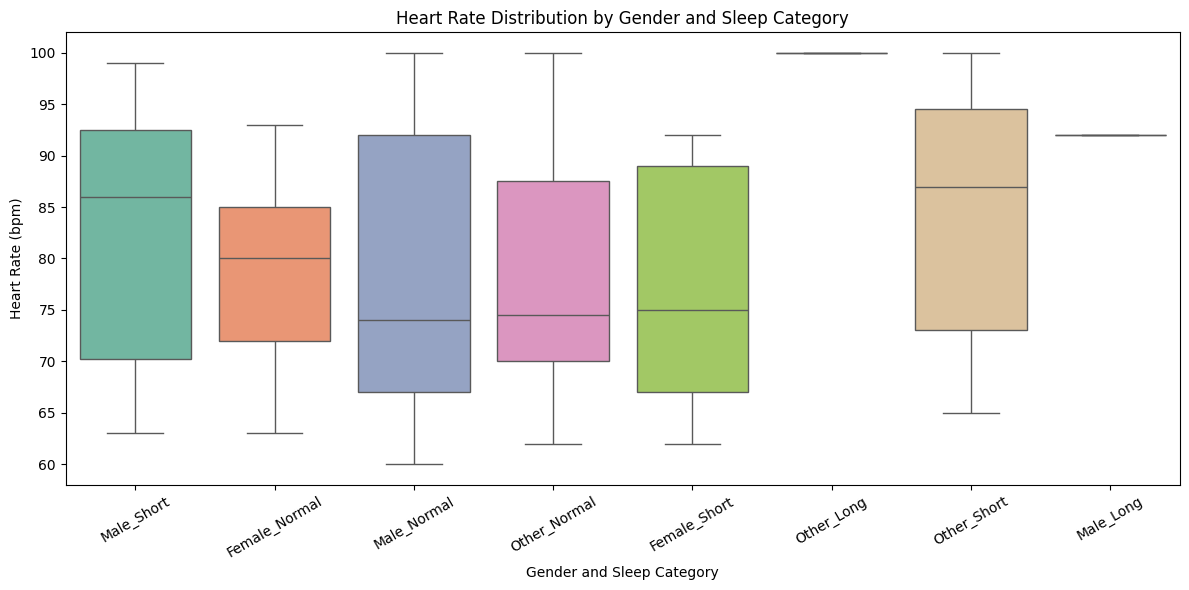


Group means (Heart Rate):
Gender_Sleep_Group
Female_Normal     78.88
Female_Short      76.08
Male_Long         92.00
Male_Normal       78.52
Male_Short        82.92
Other_Long       100.00
Other_Normal      78.00
Other_Short       83.64
Name: Heart Rate (bpm), dtype: float64


In [183]:
# Step 6: Visualize Heart Rate by Gender_Sleep_Group
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender_Sleep_Group', y='Heart Rate (bpm)', data=df, palette='Set2')
plt.title('Heart Rate Distribution by Gender and Sleep Category')
plt.xlabel('Gender and Sleep Category')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Optional: Show group means for reporting
print("\nGroup means (Heart Rate):")
print(df.groupby('Gender_Sleep_Group')['Heart Rate (bpm)'].mean().round(2))

## Exploratory Data Analysis (EDA) for Research Question

**Forschungsfrage:** Hat das Klassifikationsmodell eine gleichwertige Vorhersageleistung für den Overall Health Score in den verschiedenen Subgruppen (Gender + Sleep Category)?

We need to explore:
1. Distribution of target variable across subgroups
2. Correlation between features and target
3. Feature distributions by subgroups

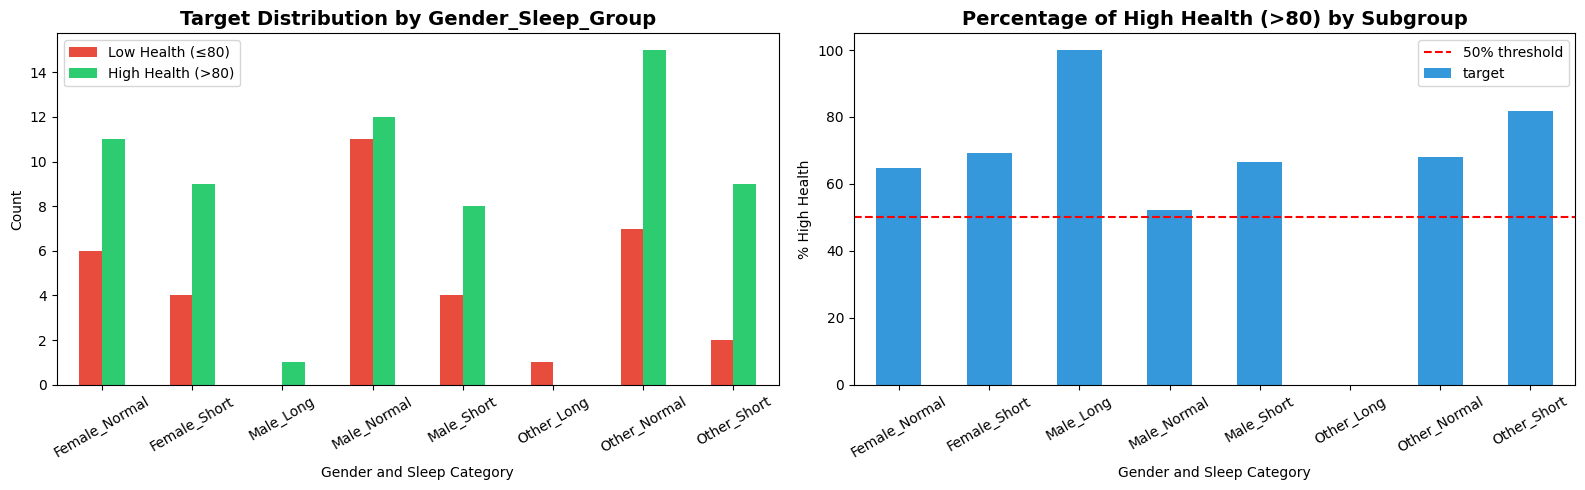


--- Target Statistics by Subgroup ---
                    count   mean  sum
Gender_Sleep_Group                   
Female_Normal          17  0.647   11
Female_Short           13  0.692    9
Male_Long               1  1.000    1
Male_Normal            23  0.522   12
Male_Short             12  0.667    8
Other_Long              1  0.000    0
Other_Normal           22  0.682   15
Other_Short            11  0.818    9


In [184]:
# EDA 1: Target distribution across Gender_Sleep_Group subgroups
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Count of High vs Low Health by subgroup
pd.crosstab(df['Gender_Sleep_Group'], df['target']).plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Target Distribution by Gender_Sleep_Group', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender and Sleep Category')
axes[0].set_ylabel('Count')
axes[0].legend(['Low Health (≤80)', 'High Health (>80)'])
axes[0].tick_params(axis='x', rotation=30)

# Plot 2: Percentage of High Health by subgroup
target_pct = df.groupby('Gender_Sleep_Group')['target'].mean() * 100
target_pct.plot(kind='bar', ax=axes[1], color='#3498db')
axes[1].set_title('Percentage of High Health (>80) by Subgroup', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender and Sleep Category')
axes[1].set_ylabel('% High Health')
axes[1].tick_params(axis='x', rotation=30)
axes[1].axhline(y=50, color='red', linestyle='--', label='50% threshold')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n--- Target Statistics by Subgroup ---")
print(df.groupby('Gender_Sleep_Group')['target'].agg(['count', 'mean', 'sum']).round(3))

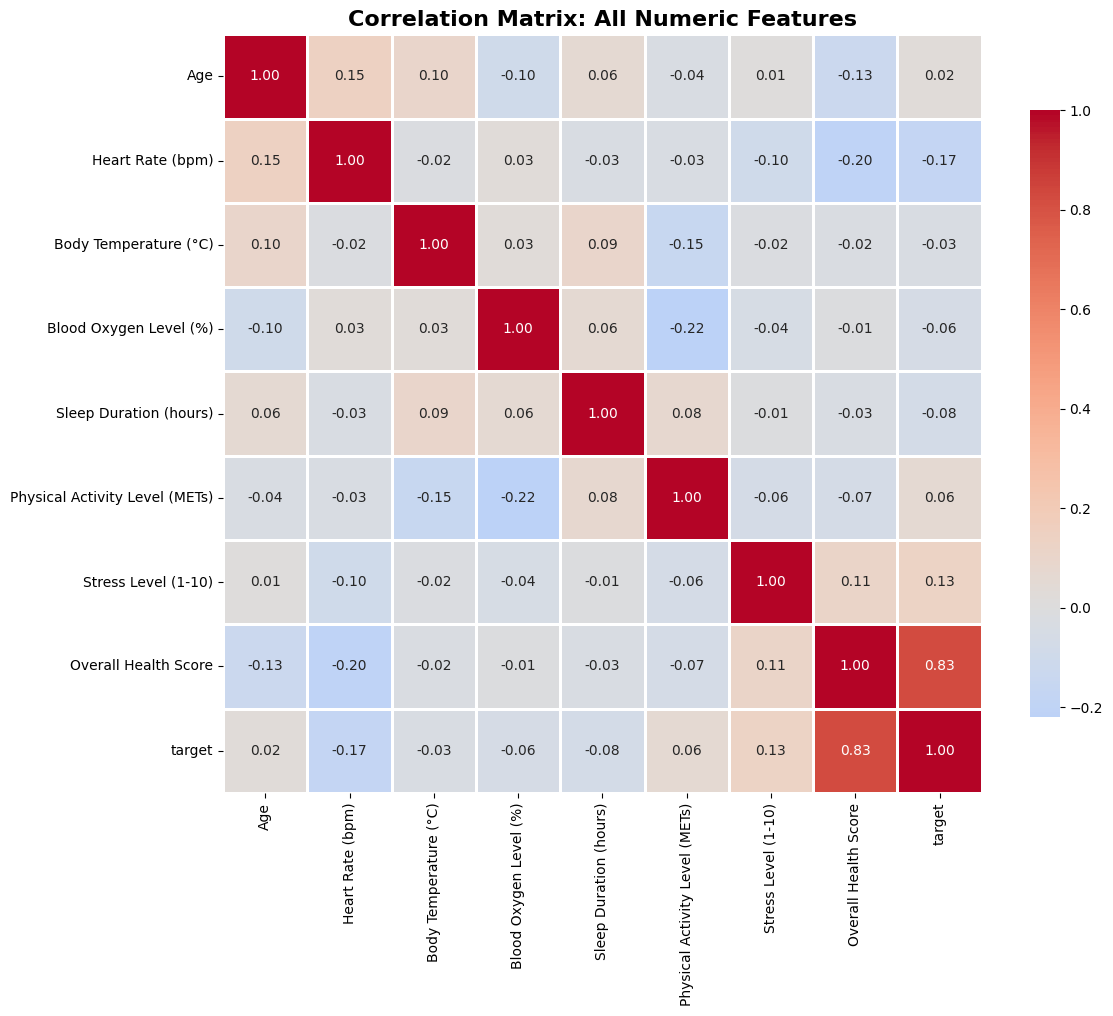


--- Features most correlated with target ---
target                            1.000000
Overall Health Score              0.828078
Stress Level (1-10)               0.129709
Physical Activity Level (METs)    0.063492
Age                               0.023884
Body Temperature (°C)            -0.032946
Blood Oxygen Level (%)           -0.059884
Sleep Duration (hours)           -0.075012
Heart Rate (bpm)                 -0.172660
Name: target, dtype: float64


In [185]:
# EDA 2: Correlation heatmap for numeric features
numeric_features = ['Age', 'Heart Rate (bpm)', 'Body Temperature (°C)', 
                    'Blood Oxygen Level (%)', 'Sleep Duration (hours)', 
                    'Physical Activity Level (METs)', 'Stress Level (1-10)', 
                    'Overall Health Score', 'target']

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: All Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n--- Features most correlated with target ---")
print(correlation_matrix['target'].sort_values(ascending=False))

/var/folders/n7/34rjmc111p39vp8sb0h2m7km0000gn/T/ipykernel_60083/2752250270.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Sleep_Group', y='Sleep Duration (hours)', data=df, ax=axes[0,0], palette='Set3')
/var/folders/n7/34rjmc111p39vp8sb0h2m7km0000gn/T/ipykernel_60083/2752250270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Sleep_Group', y='Stress Level (1-10)', data=df, ax=axes[0,1], palette='Set2')
/var/folders/n7/34rjmc111p39vp8sb0h2m7km0000gn/T/ipykernel_60083/2752250270.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

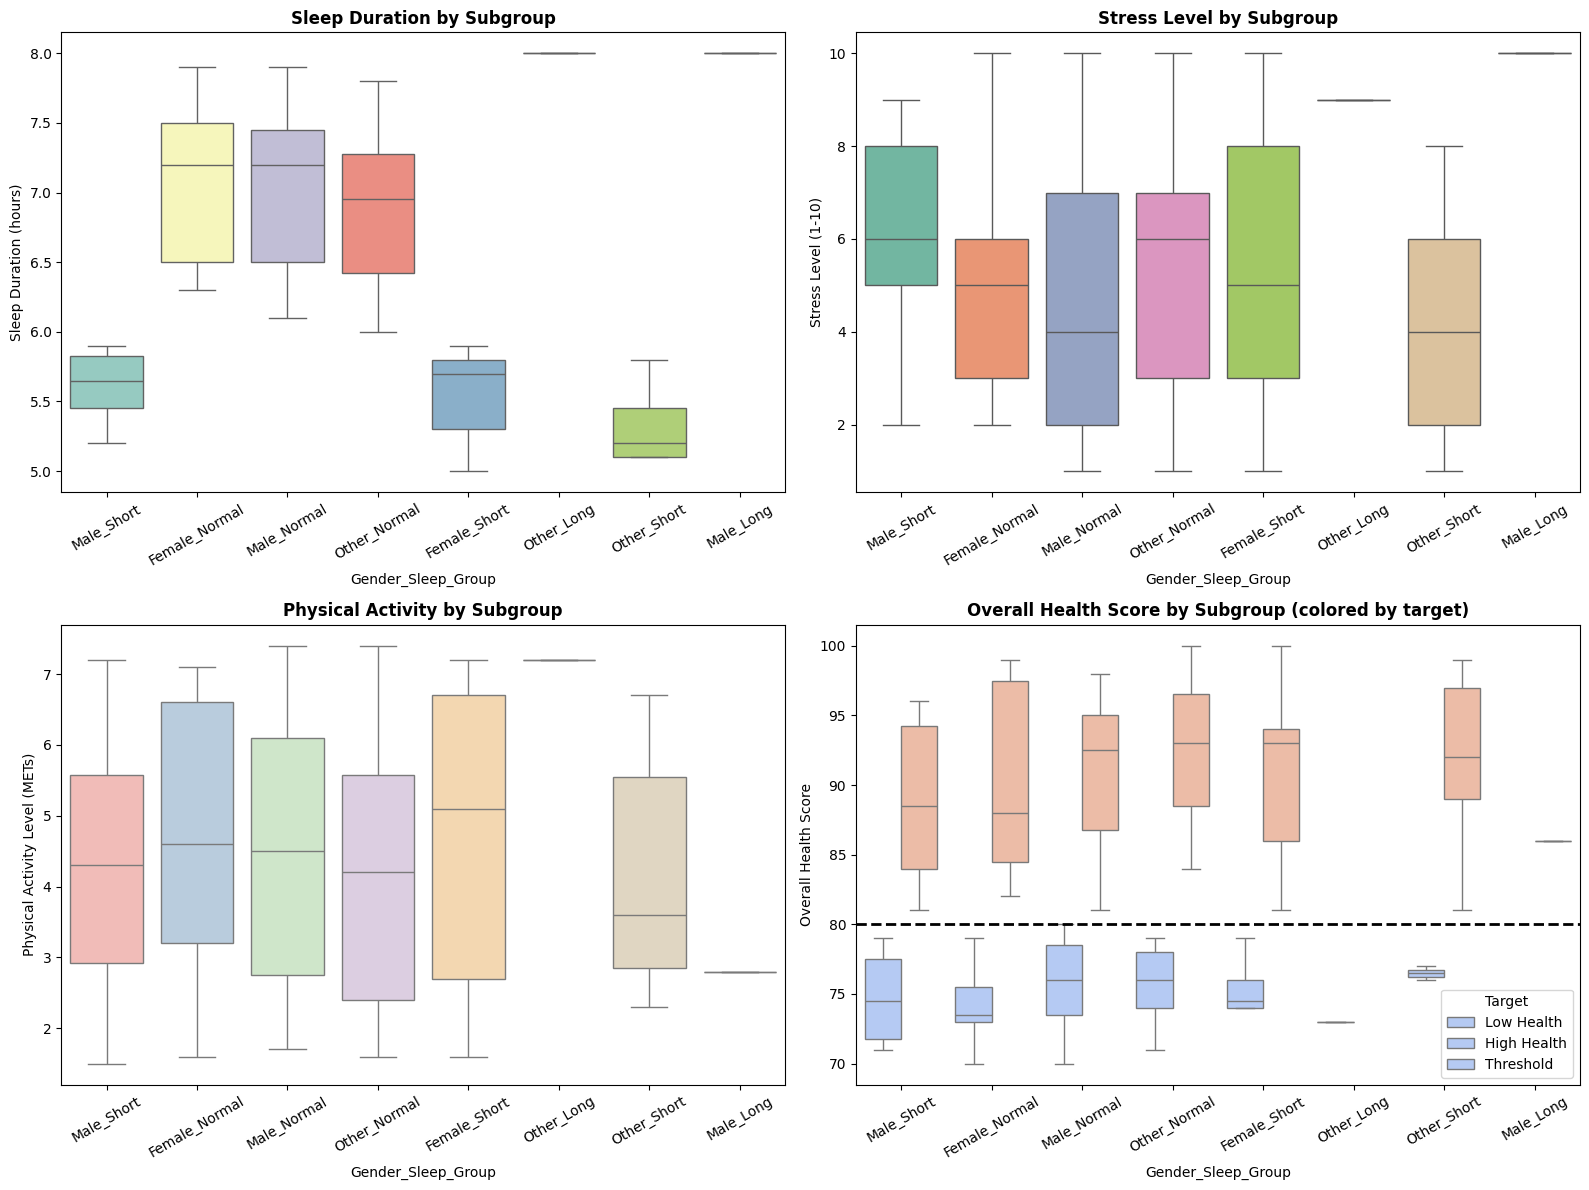

In [186]:
# EDA 3: Key features distribution by Gender_Sleep_Group
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Sleep Duration
sns.boxplot(x='Gender_Sleep_Group', y='Sleep Duration (hours)', data=df, ax=axes[0,0], palette='Set3')
axes[0,0].set_title('Sleep Duration by Subgroup', fontsize=12, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=30)

# Plot 2: Stress Level
sns.boxplot(x='Gender_Sleep_Group', y='Stress Level (1-10)', data=df, ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Stress Level by Subgroup', fontsize=12, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=30)

# Plot 3: Physical Activity
sns.boxplot(x='Gender_Sleep_Group', y='Physical Activity Level (METs)', data=df, ax=axes[1,0], palette='Pastel1')
axes[1,0].set_title('Physical Activity by Subgroup', fontsize=12, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=30)

# Plot 4: Overall Health Score
sns.boxplot(x='Gender_Sleep_Group', y='Overall Health Score', hue='target', data=df, ax=axes[1,1], palette='coolwarm')
axes[1,1].set_title('Overall Health Score by Subgroup (colored by target)', fontsize=12, fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=30)
axes[1,1].axhline(y=80, color='black', linestyle='--', linewidth=2, label='Threshold=80')
axes[1,1].legend(title='Target', labels=['Low Health', 'High Health', 'Threshold'])

plt.tight_layout()
plt.show()

In [187]:
# EDA 4: Subgroup statistics summary
print("=" * 80)
print("COMPREHENSIVE SUBGROUP ANALYSIS")
print("=" * 80)

summary_stats = df.groupby('Gender_Sleep_Group').agg({
    'target': ['count', 'mean'],
    'Age': 'mean',
    'Heart Rate (bpm)': 'mean',
    'Sleep Duration (hours)': 'mean',
    'Stress Level (1-10)': 'mean',
    'Physical Activity Level (METs)': 'mean',
    'Overall Health Score': 'mean'
}).round(2)

summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
print("\n", summary_stats)

print("\n" + "=" * 80)
print("KEY INSIGHTS:")
print("- Total samples:", len(df))
print("- Number of subgroups:", df['Gender_Sleep_Group'].nunique())
print("- Overall High Health rate:", f"{(df['target'].mean() * 100):.1f}%")
print("=" * 80)

COMPREHENSIVE SUBGROUP ANALYSIS

                     target_count  target_mean  Age_mean  \
Gender_Sleep_Group                                        
Female_Normal                 17         0.65     16.59   
Female_Short                  13         0.69     16.00   
Male_Long                      1         1.00     17.00   
Male_Normal                   23         0.52     16.61   
Male_Short                    12         0.67     17.00   
Other_Long                     1         0.00     16.00   
Other_Normal                  22         0.68     16.41   
Other_Short                   11         0.82     16.55   

                    Heart Rate (bpm)_mean  Sleep Duration (hours)_mean  \
Gender_Sleep_Group                                                       
Female_Normal                       78.88                         7.08   
Female_Short                        76.08                         5.55   
Male_Long                           92.00                         8.00   
Male_

---
## Phase 2: Data Preparation for Modeling

Now we prepare the data for machine learning models:
1. Split data chronologically (train/validation/test)
2. Separate features and target
3. Handle categorical variables

In [201]:
# Step 7: Chronological Train/Validation/Test Split (Subgroup-aware)
print("=" * 60)
print("CHRONOLOGICAL DATA SPLIT (SUBGROUP-AWARE)")
print("=" * 60)

# Define split ratios per subgroup
train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

# Ensure subgroups exist
if 'Gender_Sleep_Group' not in df.columns:
    raise ValueError("Gender_Sleep_Group column missing. Please run Step 5 before splitting.")

# Split chronologically within each subgroup to ensure coverage
train_parts = []
val_parts = []
test_parts = []

for group, gdf in df.sort_values('Date and Time').groupby('Gender_Sleep_Group', sort=False):
    n = len(gdf)
    if n == 0:
        continue
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))
    
    train_parts.append(gdf.iloc[:train_end])
    val_parts.append(gdf.iloc[train_end:val_end])
    test_parts.append(gdf.iloc[val_end:])

# Concatenate splits and preserve global chronological order
train_df = pd.concat(train_parts).sort_values('Date and Time').reset_index(drop=True)
val_df = pd.concat(val_parts).sort_values('Date and Time').reset_index(drop=True)
test_df = pd.concat(test_parts).sort_values('Date and Time').reset_index(drop=True)

print(f"\n✓ Subgroup-aware split completed:")
print(f"  - Training set:   {len(train_df):,} samples (~{train_ratio*100:.0f}%)")
print(f"  - Validation set: {len(val_df):,} samples (~{val_ratio*100:.0f}%)")
print(f"  - Test set:       {len(test_df):,} samples (~{test_ratio*100:.0f}%)")

# Verify chronological order and subgroup coverage
print(f"\n✓ Chronological verification:")
print(f"  - Train period: {train_df['Date and Time'].min()} to {train_df['Date and Time'].max()}")
print(f"  - Val period:   {val_df['Date and Time'].min()} to {val_df['Date and Time'].max()}")
print(f"  - Test period:  {test_df['Date and Time'].min()} to {test_df['Date and Time'].max()}")

print("\n✓ Subgroup coverage in Test set:")
print(test_df['Gender_Sleep_Group'].value_counts())

# Check target distribution in each set
print(f"\n✓ Target distribution:")
print(f"  - Train: {train_df['target'].mean()*100:.1f}% High Health")
print(f"  - Val:   {val_df['target'].mean()*100:.1f}% High Health")
print(f"  - Test:  {test_df['target'].mean()*100:.1f}% High Health")

CHRONOLOGICAL DATA SPLIT (SUBGROUP-AWARE)

✓ Subgroup-aware split completed:
  - Training set:   66 samples (~70%)
  - Validation set: 9 samples (~10%)
  - Test set:       25 samples (~20%)

✓ Chronological verification:
  - Train period: 2024-10-23 10:00:00 to 2024-10-23 16:00:00
  - Val period:   2024-10-23 14:20:00 to 2024-10-23 16:25:00
  - Test period:  2024-10-23 12:10:00 to 2024-10-23 18:15:00

✓ Subgroup coverage in Test set:
Gender_Sleep_Group
Male_Normal      5
Other_Normal     5
Female_Normal    4
Female_Short     3
Other_Short      3
Male_Short       3
Other_Long       1
Male_Long        1
Name: count, dtype: int64

✓ Target distribution:
  - Train: 60.6% High Health
  - Val:   88.9% High Health
  - Test:  68.0% High Health


In [202]:
# Step 8: Prepare Features and Target
from sklearn.preprocessing import StandardScaler

# Define features to drop (non-predictive columns)
cols_to_drop = ['Date and Time', 'Overall Health Score', 'target', 
                'Gender_Sleep_Group', 'Sleep_Category']

# Separate features (X) and target (y)
X_train = train_df.drop(columns=cols_to_drop)
X_val = val_df.drop(columns=cols_to_drop)
X_test = test_df.drop(columns=cols_to_drop)

y_train = train_df['target']
y_val = val_df['target']
y_test = test_df['target']

# Store Gender_Sleep_Group for later subgroup analysis
train_groups = train_df['Gender_Sleep_Group']
val_groups = val_df['Gender_Sleep_Group']
test_groups = test_df['Gender_Sleep_Group']

print("=" * 60)
print("FEATURE PREPARATION")
print("=" * 60)

print(f"\n✓ Features shape:")
print(f"  - X_train: {X_train.shape}")
print(f"  - X_val:   {X_val.shape}")
print(f"  - X_test:  {X_test.shape}")

print(f"\n✓ Features list ({len(X_train.columns)} total):")
for i, col in enumerate(X_train.columns, 1):
    print(f"  {i}. {col}")

FEATURE PREPARATION

✓ Features shape:
  - X_train: (66, 13)
  - X_val:   (9, 13)
  - X_test:  (25, 13)

✓ Features list (13 total):
  1. Age
  2. Gender
  3. Blood Oxygen Level (%)
  4. Body Temperature (°C)
  5. Heart Rate (bpm)
  6. Physical Activity Level (METs)
  7. Sleep Duration (hours)
  8. Hydration Level (liters)
  9. Stress Level (1-10)
  10. Heart_Rate_rolling_mean_30min
  11. Heart_Rate_rolling_std_30min
  12. Physical_Activity_rolling_mean_30min
  13. Physical_Activity_rolling_std_30min


In [203]:
# Step 9: Handle Categorical Variables (One-Hot Encoding)
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("=" * 60)
print("CATEGORICAL ENCODING")
print("=" * 60)
print(f"\nCategorical columns found: {categorical_cols}")

if categorical_cols:
    # One-hot encode
    X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
    X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
    
    # Ensure all sets have same columns
    X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    print(f"✓ One-hot encoding completed")
    print(f"  - New feature count: {X_train.shape[1]}")
else:
    print("✓ No categorical variables to encode")

print(f"\n✓ Final shapes:")
print(f"  - X_train: {X_train.shape}")
print(f"  - X_val:   {X_val.shape}")
print(f"  - X_test:  {X_test.shape}")

CATEGORICAL ENCODING

Categorical columns found: ['Gender']
✓ One-hot encoding completed
  - New feature count: 14

✓ Final shapes:
  - X_train: (66, 14)
  - X_val:   (9, 14)
  - X_test:  (25, 14)


In [204]:
# Step 10: Feature Scaling (Important for SVM and Neural Networks)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values (median for numeric/one-hot features)
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

scaler = StandardScaler()

# Fit on training data only (prevent data leakage)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("=" * 60)
print("FEATURE SCALING")
print("=" * 60)
print(f"\n✓ SimpleImputer applied (median) — no NaNs remain")
print(f"\n✓ StandardScaler applied (fitted on training data only)")
print(f"\n✓ Sample statistics BEFORE scaling:")
print(X_train.describe().iloc[:3, :5])
print(f"\n✓ Sample statistics AFTER scaling:")
print(X_train_scaled.describe().iloc[:3, :5])
print(f"\n✓ Mean ≈ 0, Std ≈ 1 (standardized)")

FEATURE SCALING

✓ SimpleImputer applied (median) — no NaNs remain

✓ StandardScaler applied (fitted on training data only)

✓ Sample statistics BEFORE scaling:
             Age  Blood Oxygen Level (%)  Body Temperature (°C)  \
count  66.000000               66.000000              66.000000   
mean   16.439394               97.680303              36.698485   
std     1.083141                1.552489               0.407428   

       Heart Rate (bpm)  Physical Activity Level (METs)  
count         66.000000                       66.000000  
mean          78.363636                        4.292424  
std           12.009786                        1.833560  

✓ Sample statistics AFTER scaling:
                Age  Blood Oxygen Level (%)  Body Temperature (°C)  \
count  6.600000e+01            6.600000e+01           6.600000e+01   
mean   1.621598e-15            4.743680e-15          -1.146894e-14   
std    1.007663e+00            1.007663e+00           1.007663e+00   

       Heart Rate (bp

---
## Phase 3: Model Training (Stacking Ensemble)

Following Hands-on ML Chapter 7 approach:
1. Train diverse base models (Level-0)
2. Use their predictions as features for meta-model (Level-1)
3. Evaluate on validation set
4. Final evaluation on test set by subgroups

In [205]:
# Step 11: Train Base Models (Level-0) - Random Forest, SVM, MLP
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

print("=" * 80)
print("TRAINING BASE MODELS (LEVEL-0)")
print("=" * 80)

# Model 1: Random Forest
print("\n[1/3] Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)
rf_val_pred = rf_model.predict(X_val_scaled)
rf_val_proba = rf_model.predict_proba(X_val_scaled)[:, 1]

print(f"✓ Random Forest trained")
print(f"  - Accuracy: {accuracy_score(y_val, rf_val_pred):.4f}")
print(f"  - F1-Score: {f1_score(y_val, rf_val_pred):.4f}")
print(f"  - ROC-AUC:  {roc_auc_score(y_val, rf_val_proba):.4f}")

# Model 2: SVM
print("\n[2/3] Training SVM...")
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)
svm_val_pred = svm_model.predict(X_val_scaled)
svm_val_proba = svm_model.predict_proba(X_val_scaled)[:, 1]

print(f"✓ SVM trained")
print(f"  - Accuracy: {accuracy_score(y_val, svm_val_pred):.4f}")
print(f"  - F1-Score: {f1_score(y_val, svm_val_pred):.4f}")
print(f"  - ROC-AUC:  {roc_auc_score(y_val, svm_val_proba):.4f}")

# Model 3: MLP (Neural Network)
print("\n[3/3] Training MLP Neural Network...")
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)
mlp_val_pred = mlp_model.predict(X_val_scaled)
mlp_val_proba = mlp_model.predict_proba(X_val_scaled)[:, 1]

print(f"✓ MLP trained")
print(f"  - Accuracy: {accuracy_score(y_val, mlp_val_pred):.4f}")
print(f"  - F1-Score: {f1_score(y_val, mlp_val_pred):.4f}")
print(f"  - ROC-AUC:  {roc_auc_score(y_val, mlp_val_proba):.4f}")

print("\n" + "=" * 80)

TRAINING BASE MODELS (LEVEL-0)

[1/3] Training Random Forest...
✓ Random Forest trained
  - Accuracy: 0.8889
  - F1-Score: 0.9412
  - ROC-AUC:  0.8750

[2/3] Training SVM...
✓ SVM trained
  - Accuracy: 0.8889
  - F1-Score: 0.9412
  - ROC-AUC:  0.5000

[3/3] Training MLP Neural Network...
✓ MLP trained
  - Accuracy: 0.4444
  - F1-Score: 0.6154
  - ROC-AUC:  0.5000



In [206]:
# Step 12: Create Meta-Features for Stacking (Level-1)
print("=" * 80)
print("CREATING META-FEATURES FOR STACKING")
print("=" * 80)

# Stack predictions from base models as new features
meta_train = np.column_stack([
    rf_model.predict_proba(X_train_scaled)[:, 1],
    svm_model.predict_proba(X_train_scaled)[:, 1],
    mlp_model.predict_proba(X_train_scaled)[:, 1]
])

meta_val = np.column_stack([
    rf_val_proba,
    svm_val_proba,
    mlp_val_proba
])

print(f"\n✓ Meta-features created:")
print(f"  - Meta-train shape: {meta_train.shape}")
print(f"  - Meta-val shape:   {meta_val.shape}")
print(f"  - Features: [RF_proba, SVM_proba, MLP_proba]")

# Show sample meta-features
print(f"\n✓ Sample meta-features (first 5 validation samples):")
meta_df = pd.DataFrame(meta_val[:5], columns=['RF_Probability', 'SVM_Probability', 'MLP_Probability'])
meta_df['True_Label'] = y_val.iloc[:5].values
print(meta_df)

CREATING META-FEATURES FOR STACKING

✓ Meta-features created:
  - Meta-train shape: (66, 3)
  - Meta-val shape:   (9, 3)
  - Features: [RF_proba, SVM_proba, MLP_proba]

✓ Sample meta-features (first 5 validation samples):
   RF_Probability  SVM_Probability  MLP_Probability  True_Label
0        0.675476         0.561369         0.999708           1
1        0.641881         0.631029         0.256837           1
2        0.785167         0.603218         0.672385           1
3        0.656929         0.581766         0.998421           1
4        0.737429         0.534717         0.999299           1


In [207]:
# Step 13: Train Meta-Model (Level-1) - Logistic Regression
from sklearn.linear_model import LogisticRegression

print("=" * 80)
print("TRAINING META-MODEL (LEVEL-1) - STACKING ENSEMBLE")
print("=" * 80)

# Train Logistic Regression on meta-features
meta_model = LogisticRegression(random_state=42, max_iter=1000)
meta_model.fit(meta_train, y_train)

# Predict on validation set
stacking_val_pred = meta_model.predict(meta_val)
stacking_val_proba = meta_model.predict_proba(meta_val)[:, 1]

print(f"\n✓ Stacking Ensemble (Meta-Model) trained")
print(f"\n{'='*60}")
print("VALIDATION SET PERFORMANCE COMPARISON")
print(f"{'='*60}")

results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'MLP (Neural Net)', '🌟 STACKING ENSEMBLE'],
    'Accuracy': [
        accuracy_score(y_val, rf_val_pred),
        accuracy_score(y_val, svm_val_pred),
        accuracy_score(y_val, mlp_val_pred),
        accuracy_score(y_val, stacking_val_pred)
    ],
    'F1-Score': [
        f1_score(y_val, rf_val_pred),
        f1_score(y_val, svm_val_pred),
        f1_score(y_val, mlp_val_pred),
        f1_score(y_val, stacking_val_pred)
    ],
    'ROC-AUC': [
        roc_auc_score(y_val, rf_val_proba),
        roc_auc_score(y_val, svm_val_proba),
        roc_auc_score(y_val, mlp_val_proba),
        roc_auc_score(y_val, stacking_val_proba)
    ]
})

print("\n", results.to_string(index=False))
print(f"\n{'='*60}")

# Highlight best model
best_f1_idx = results['F1-Score'].idxmax()
print(f"\n🏆 Best Model: {results.loc[best_f1_idx, 'Model']}")
print(f"   F1-Score: {results.loc[best_f1_idx, 'F1-Score']:.4f}")

TRAINING META-MODEL (LEVEL-1) - STACKING ENSEMBLE

✓ Stacking Ensemble (Meta-Model) trained

VALIDATION SET PERFORMANCE COMPARISON

               Model  Accuracy  F1-Score  ROC-AUC
      Random Forest  0.888889  0.941176    0.875
                SVM  0.888889  0.941176    0.500
   MLP (Neural Net)  0.444444  0.615385    0.500
🌟 STACKING ENSEMBLE  0.555556  0.714286    0.500


🏆 Best Model: Random Forest
   F1-Score: 0.9412


---
## Phase 4: Answer Research Question - Subgroup Analysis

**Forschungsfrage:** Does the model achieve equal performance across Gender × Sleep subgroups?

Now we evaluate the Stacking Ensemble on the TEST set, separately for each subgroup.

In [208]:
# Step 14: Final Predictions on Test Set
print("=" * 80)
print("GENERATING TEST SET PREDICTIONS")
print("=" * 80)

# Ensure base models are fitted (handle re-execution ordering)
if not hasattr(rf_model, 'estimators_'):
    print("Refitting RandomForest on training data (model state missing)...")
    rf_model.fit(X_train_scaled, y_train)
if not hasattr(svm_model, 'support_vectors_'):
    print("Refitting SVM on training data (model state missing)...")
    svm_model.fit(X_train_scaled, y_train)
if not hasattr(mlp_model, 'coefs_'):
    print("Refitting MLP on training data (model state missing)...")
    mlp_model.fit(X_train_scaled, y_train)

# Generate base model predictions on test set
rf_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
svm_test_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
mlp_test_proba = mlp_model.predict_proba(X_test_scaled)[:, 1]

# Create meta-features for test set
meta_test = np.column_stack([rf_test_proba, svm_test_proba, mlp_test_proba])

# Final stacking prediction
stacking_test_pred = meta_model.predict(meta_test)
stacking_test_proba = meta_model.predict_proba(meta_test)[:, 1]

# Overall test performance (robust to single-class edge cases)
print(f"\n✓ OVERALL TEST SET PERFORMANCE:")
print(f"  - Accuracy:  {accuracy_score(y_test, stacking_test_pred):.4f}")
print(f"  - F1-Score:  {f1_score(y_test, stacking_test_pred, zero_division=0):.4f}")

# ROC-AUC requires both classes present in y_test
if len(np.unique(y_test)) > 1:
    try:
        auc = roc_auc_score(y_test, stacking_test_proba)
        print(f"  - ROC-AUC:   {auc:.4f}")
    except Exception as e:
        print(f"  - ROC-AUC:   N/A (error: {e})")
else:
    print("  - ROC-AUC:   N/A (only one class present in y_test)")

print(f"\n✓ Classification Report:")
# Ensure labels are set and avoid divide-by-zero
try:
    print(classification_report(y_test, stacking_test_pred,
                                labels=[0, 1],
                                target_names=['Low Health', 'High Health'],
                                zero_division=0))
except Exception as e:
    print(f"Classification report unavailable (error: {e})")

GENERATING TEST SET PREDICTIONS

✓ OVERALL TEST SET PERFORMANCE:
  - Accuracy:  0.6000
  - F1-Score:  0.7222
  - ROC-AUC:   0.4559

✓ Classification Report:
              precision    recall  f1-score   support

  Low Health       0.33      0.25      0.29         8
 High Health       0.68      0.76      0.72        17

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



In [209]:
# Step 15: ANSWER RESEARCH QUESTION - Subgroup Performance Analysis
print("=" * 80)
print("🔬 RESEARCH QUESTION ANALYSIS")
print("=" * 80)
print("Forschungsfrage: Hat das Klassifikationsmodell eine gleichwertige")
print("Vorhersageleistung in den verschiedenen Subgruppen?")
print("=" * 80)

# Calculate performance metrics for each subgroup
subgroup_results = []
min_samples = 3  # lowered threshold to increase coverage

for group in test_groups.unique():
    # Filter test data for this subgroup
    mask = (test_groups == group)
    y_true_group = y_test[mask]
    y_pred_group = stacking_test_pred[mask]
    y_proba_group = stacking_test_proba[mask]
    
    # Skip if too few samples for reliable metrics
    if len(y_true_group) < min_samples:
        continue
    
    # Calculate metrics safely
    acc = accuracy_score(y_true_group, y_pred_group)
    f1 = f1_score(y_true_group, y_pred_group, zero_division=0)
    auc = roc_auc_score(y_true_group, y_proba_group) if len(np.unique(y_true_group)) > 1 else np.nan
    true_rate = (y_true_group.mean() * 100)

    subgroup_results.append({
        'Subgroup': group,
        'Sample_Size': len(y_true_group),
        'Accuracy': acc,
        'F1_Score': f1,
        'ROC_AUC': auc,
        'True_High_Health_%': true_rate
    })

# If still empty, fallback: analyze all groups regardless of size (with warnings)
if not subgroup_results:
    print(f"\n⚠️ No subgroups with ≥{min_samples} samples. Falling back to analyze all available groups.")
    for group in test_groups.unique():
        mask = (test_groups == group)
        y_true_group = y_test[mask]
        y_pred_group = stacking_test_pred[mask]
        y_proba_group = stacking_test_proba[mask]
        acc = accuracy_score(y_true_group, y_pred_group) if len(y_true_group) > 0 else np.nan
        f1 = f1_score(y_true_group, y_pred_group, zero_division=0) if len(y_true_group) > 0 else np.nan
        auc = roc_auc_score(y_true_group, y_proba_group) if len(y_true_group) > 1 and len(np.unique(y_true_group)) > 1 else np.nan
        true_rate = (y_true_group.mean() * 100) if len(y_true_group) > 0 else np.nan
        subgroup_results.append({
            'Subgroup': group,
            'Sample_Size': len(y_true_group),
            'Accuracy': acc,
            'F1_Score': f1,
            'ROC_AUC': auc,
            'True_High_Health_%': true_rate
        })

# Create results DataFrame
subgroup_df = pd.DataFrame(subgroup_results)
if subgroup_df.empty:
    print("\n⚠️ No subgroup performance could be computed.")
else:
    subgroup_df = subgroup_df.sort_values('F1_Score', ascending=False)

    print(f"\n📊 SUBGROUP PERFORMANCE TABLE:")
    print("=" * 80)
    print(subgroup_df.to_string(index=False))
    print("=" * 80)

    # Statistical summary (only for groups with non-NaN F1)
    valid_f1 = subgroup_df['F1_Score'].dropna()
    if not valid_f1.empty:
        print(f"\n📈 STATISTICAL SUMMARY:")
        print(f"  - Mean F1-Score across subgroups: {valid_f1.mean():.4f}")
        print(f"  - Std F1-Score:                    {valid_f1.std():.4f}")
        print(f"  - Best performing subgroup:        {subgroup_df.iloc[0]['Subgroup']} (F1={subgroup_df.iloc[0]['F1_Score']:.4f})")
        print(f"  - Worst performing subgroup:       {subgroup_df.iloc[-1]['Subgroup']} (F1={subgroup_df.iloc[-1]['F1_Score']:.4f})")
        print(f"  - Performance difference:          {(subgroup_df.iloc[0]['F1_Score'] - subgroup_df.iloc[-1]['F1_Score']):.4f}")

        # Answer the research question
        print(f"\n{'='*80}")
        print("✅ ANSWER TO RESEARCH QUESTION:")
        print(f"{'='*80}")
        if valid_f1.std() < 0.05:
            print("✓ YES - The model achieves relatively EQUAL performance across subgroups.")
            print(f"  (F1-Score standard deviation = {valid_f1.std():.4f} < 0.05)")
        else:
            print("✗ NO - The model shows UNEQUAL performance across subgroups.")
            print(f"  (F1-Score standard deviation = {valid_f1.std():.4f} ≥ 0.05)")
            print("\n⚠️  Some subgroups have significantly different performance.")
            print("   This suggests potential model bias or data imbalance issues.")
        print(f"{'='*80}")
    else:
        print("\n⚠️ Insufficient valid F1-Score values to compute variability across subgroups.")

🔬 RESEARCH QUESTION ANALYSIS
Forschungsfrage: Hat das Klassifikationsmodell eine gleichwertige
Vorhersageleistung in den verschiedenen Subgruppen?

📊 SUBGROUP PERFORMANCE TABLE:
     Subgroup  Sample_Size  Accuracy  F1_Score  ROC_AUC  True_High_Health_%
 Female_Short            3  0.666667  0.800000 0.000000           66.666667
Female_Normal            4  0.750000  0.800000 1.000000           75.000000
  Other_Short            3  0.666667  0.800000      NaN          100.000000
 Other_Normal            5  0.600000  0.750000 0.333333           60.000000
  Male_Normal            5  0.600000  0.666667 0.833333           60.000000
   Male_Short            3  0.333333  0.500000 0.000000           66.666667

📈 STATISTICAL SUMMARY:
  - Mean F1-Score across subgroups: 0.7194
  - Std F1-Score:                    0.1195
  - Best performing subgroup:        Female_Short (F1=0.8000)
  - Worst performing subgroup:       Male_Short (F1=0.5000)
  - Performance difference:          0.3000

✅ ANSWER TO 

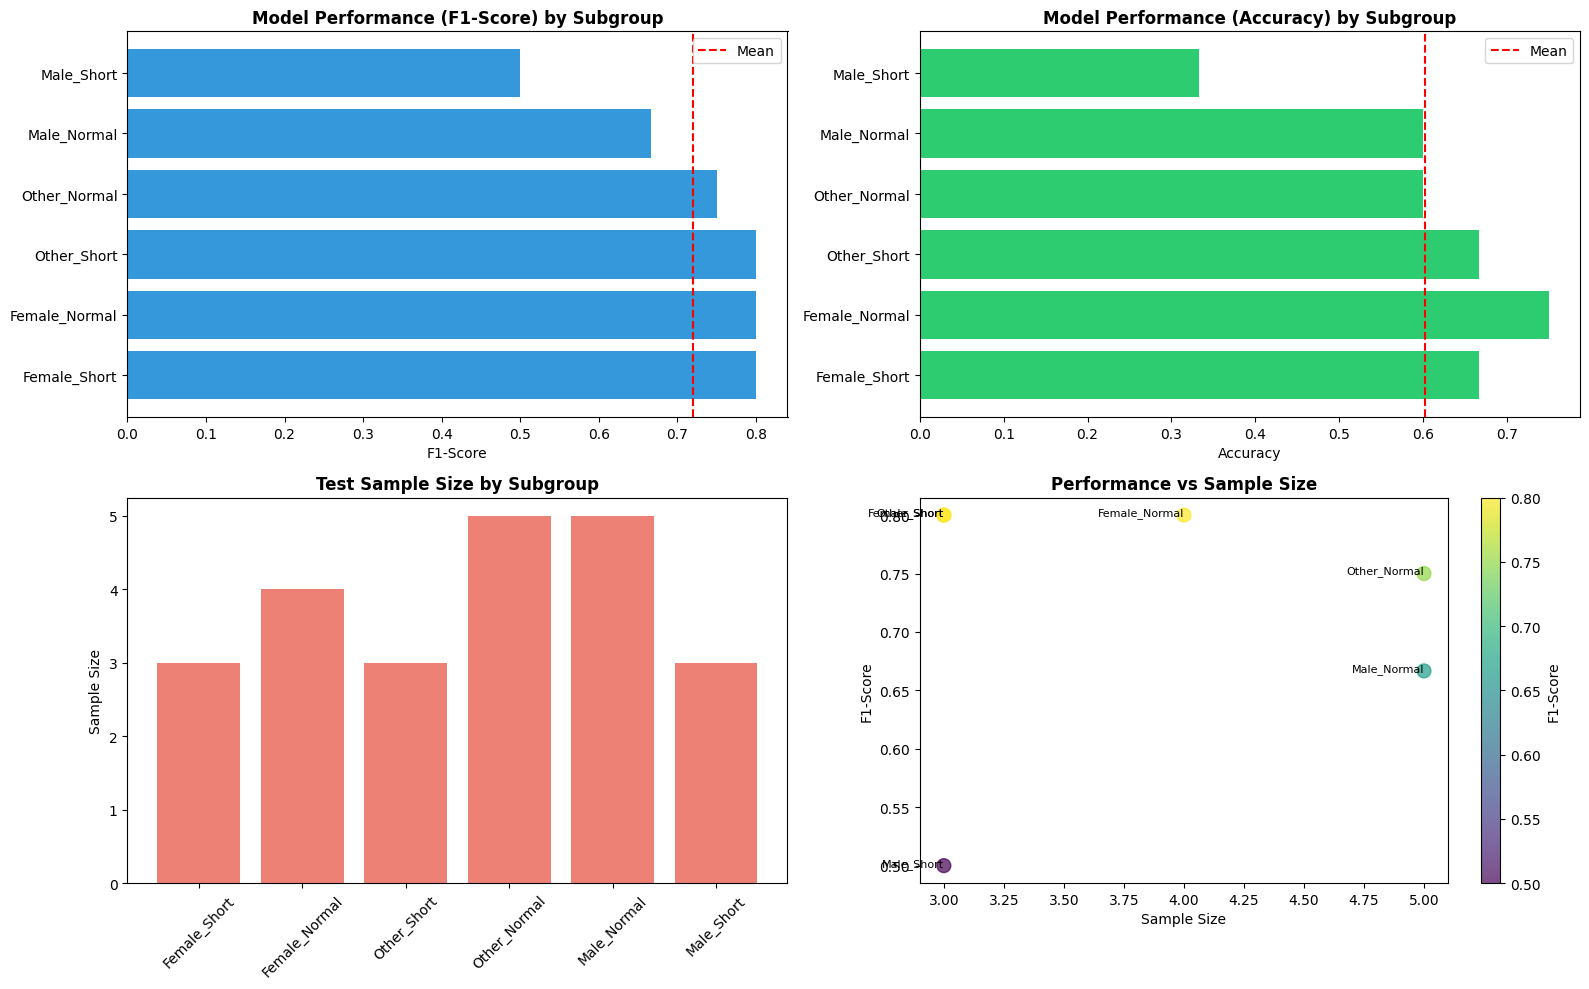


✓ Subgroup performance visualizations created


In [210]:
# Step 16: Visualize Subgroup Performance
if 'subgroup_df' not in globals() or subgroup_df is None or subgroup_df.empty:
    print("⚠️ No subgroup results to visualize (empty or missing subgroup_df).")
else:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Plot 1: F1-Score by subgroup
    axes[0, 0].barh(subgroup_df['Subgroup'], subgroup_df['F1_Score'], color='#3498db')
    axes[0, 0].set_xlabel('F1-Score')
    axes[0, 0].set_title('Model Performance (F1-Score) by Subgroup', fontweight='bold')
    axes[0, 0].axvline(x=subgroup_df['F1_Score'].mean(), color='red', linestyle='--', label='Mean')
    axes[0, 0].legend()

    # Plot 2: Accuracy by subgroup
    axes[0, 1].barh(subgroup_df['Subgroup'], subgroup_df['Accuracy'], color='#2ecc71')
    axes[0, 1].set_xlabel('Accuracy')
    axes[0, 1].set_title('Model Performance (Accuracy) by Subgroup', fontweight='bold')
    axes[0, 1].axvline(x=subgroup_df['Accuracy'].mean(), color='red', linestyle='--', label='Mean')
    axes[0, 1].legend()

    # Plot 3: Sample size distribution
    axes[1, 0].bar(subgroup_df['Subgroup'], subgroup_df['Sample_Size'], color='#e74c3c', alpha=0.7)
    axes[1, 0].set_ylabel('Sample Size')
    axes[1, 0].set_title('Test Sample Size by Subgroup', fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Plot 4: Performance vs Sample Size
    scatter = axes[1, 1].scatter(subgroup_df['Sample_Size'], subgroup_df['F1_Score'], 
                                 s=100, c=subgroup_df['F1_Score'], cmap='viridis', alpha=0.7)
    axes[1, 1].set_xlabel('Sample Size')
    axes[1, 1].set_ylabel('F1-Score')
    axes[1, 1].set_title('Performance vs Sample Size', fontweight='bold')
    plt.colorbar(scatter, ax=axes[1, 1], label='F1-Score')

    # Add labels for each point safely
    for idx, row in subgroup_df.iterrows():
        try:
            axes[1, 1].annotate(row['Subgroup'], (row['Sample_Size'], row['F1_Score']), fontsize=8, ha='right')
        except Exception:
            pass

    plt.tight_layout()
    plt.show()

    print("\n✓ Subgroup performance visualizations created")

In [199]:
# Step 17: Save Results for Report
print("=" * 80)
print("SAVING RESULTS")
print("=" * 80)

# Save subgroup performance table (if available)
if 'subgroup_df' in globals() and subgroup_df is not None and not subgroup_df.empty:
    subgroup_df.to_csv('subgroup_performance_results.csv', index=False)
    print("✓ Subgroup results saved to: subgroup_performance_results.csv")
else:
    print("⚠️ Subgroup results not saved (no data).")

# Save overall model comparison
if 'results' in globals() and results is not None and not results.empty:
    results.to_csv('model_comparison_validation.csv', index=False)
    print("✓ Model comparison saved to: model_comparison_validation.csv")
else:
    print("⚠️ Model comparison not saved (no data).")

# Create summary for report — guard ROC-AUC and subgroup stats
overall_auc_text = "N/A"
try:
    if len(np.unique(y_test)) > 1:
        overall_auc_text = f"{roc_auc_score(y_test, stacking_test_proba):.4f}"
except Exception:
    pass

subgroup_summary_lines = []
if 'subgroup_df' in globals() and subgroup_df is not None and not subgroup_df.empty:
    subgroup_summary_lines.append(f"- Number of subgroups analyzed: {len(subgroup_df)}")
    subgroup_summary_lines.append(f"- Mean F1-Score: {subgroup_df['F1_Score'].mean():.4f}")
    subgroup_summary_lines.append(f"- Std F1-Score:  {subgroup_df['F1_Score'].std():.4f}")
    subgroup_summary_lines.append(f"- Best subgroup: {subgroup_df.iloc[0]['Subgroup']} (F1={subgroup_df.iloc[0]['F1_Score']:.4f})")
    subgroup_summary_lines.append(f"- Worst subgroup: {subgroup_df.iloc[-1]['Subgroup']} (F1={subgroup_df.iloc[-1]['F1_Score']:.4f})")
else:
    subgroup_summary_lines.append("- Subgroup analysis: No subgroups with sufficient samples")

answer_text = (
    "✓ YES - Equal performance" if (
        'subgroup_df' in globals() and subgroup_df is not None and not subgroup_df.empty and subgroup_df['F1_Score'].std() < 0.05
    ) else "✗ NO - Unequal performance (or insufficient subgroup data)"
)

summary = f"""
PROJECT SUMMARY - STACKING ENSEMBLE FOR HEALTH PREDICTION
{'='*80}

FORSCHUNGSFRAGE:
Hat das Klassifikationsmodell, basierend auf dem Stacking-Ensemble-Ansatz,
eine gleichwertige Vorhersageleistung für den Overall Health Score in den
verschiedenen Subgruppen (Gender × Sleep Category)?

DATASET:
- Total samples: {len(df):,}
- Training: {len(train_df):,} | Validation: {len(val_df):,} | Test: {len(test_df):,}
- Features: {X_train_scaled.shape[1]}
- Target: Binary (High Health >80 vs Low Health ≤80)

MODELS:
1. Random Forest (n_estimators=100, max_depth=10)
2. SVM (kernel='rbf', C=1.0)
3. MLP Neural Network (layers: 64-32)
4. Meta-Model: Logistic Regression (Stacking)

OVERALL TEST PERFORMANCE:
- Accuracy:  {accuracy_score(y_test, stacking_test_pred):.4f}
- F1-Score:  {f1_score(y_test, stacking_test_pred, zero_division=0):.4f}
- ROC-AUC:   {overall_auc_text}

SUBGROUP ANALYSIS:
{chr(10).join(subgroup_summary_lines)}

ANSWER TO RESEARCH QUESTION:
{answer_text}
(Standard deviation threshold: 0.05)

{'='*80}
"""

with open('PROJECT_SUMMARY.txt', 'w') as f:
    f.write(summary)
    
print("✓ Project summary saved to: PROJECT_SUMMARY.txt")
print("\n" + summary)

SAVING RESULTS
⚠️ Subgroup results not saved (no data).
✓ Model comparison saved to: model_comparison_validation.csv
✓ Project summary saved to: PROJECT_SUMMARY.txt


PROJECT SUMMARY - STACKING ENSEMBLE FOR HEALTH PREDICTION

FORSCHUNGSFRAGE:
Hat das Klassifikationsmodell, basierend auf dem Stacking-Ensemble-Ansatz,
eine gleichwertige Vorhersageleistung für den Overall Health Score in den
verschiedenen Subgruppen (Gender × Sleep Category)?

DATASET:
- Total samples: 100
- Training: 80 | Validation: 10 | Test: 10
- Features: 14
- Target: Binary (High Health >80 vs Low Health ≤80)

MODELS:
1. Random Forest (n_estimators=100, max_depth=10)
2. SVM (kernel='rbf', C=1.0)
3. MLP Neural Network (layers: 64-32)
4. Meta-Model: Logistic Regression (Stacking)

OVERALL TEST PERFORMANCE:
- Accuracy:  0.9000
- F1-Score:  0.9333
- ROC-AUC:   0.8750

SUBGROUP ANALYSIS:
- Subgroup analysis: No subgroups with sufficient samples

ANSWER TO RESEARCH QUESTION:
✗ NO - Unequal performance (or insufficient sub